# Исследование рынка заведений общественного питания Москвы

## Описание проекта

Небольшое кафе в Москве готовится к открытию. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами создатели решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — смогут ли создатели снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Создатели — гуру аналитики, и партнёры просят подготовить исследование рынка. Есть открытые данные о заведениях общественного питания в Москве, которые нужно проанализировать.

### Описание данных

Таблица `rest_data`:

`id` — идентификатор объекта;

`object_name` — название объекта общественного питания;

`chain` — сетевой ресторан;

`object_type` — тип объекта общественного питания;

`address` — адрес;

`number` — количество посадочных мест.

### Задачи проекта

В этом проекте необходимо проделать большую работу:

1. Проверить данные на отсутствие ошибок и обработать при необходимости - убрать дубликаты, заменить неправильные типы, заменить или удалить пропуски;

2. Проанализировать данные и построить графики:
* исследовать соотношение видов объектов общественного питания по количеству;
* исследовать соотношение сетевых и несетевых заведений по количеству;
* определить процент сетевого распространения среди всех видов объектов;
* определить число посадочных мест и количество заведений, найти самое большое среднее количество посадочных мест;
* определить топ-10 улиц по количеству объектов и число улиц, где всего один объект, а также определить их районы расположения;
* дать рекомендации создателям кафе на основе проанализированных данных;
3. Подготовить презентацию с результатами.

## Шаг 1. Подготовка к анализу данных

Как обычно, перед началом работы импортируем нужные библиотеки и откроем файлы.

In [37]:
# импорт нужных библиотек
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
%config InlineBackend.figure_format = 'retina' # для красивых графиков
matplotlib.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

# чтение файла
rest_data = pd.read_csv('/datasets/rest_data.csv')

# первые 10 строк
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Для удобства анализа стоит привести к нижнему регистру значения в столбцах `object_name` и `address`. Также значения в столбце `chain` лучше сделать более понятными - например, `сетевое/несетевое`.

Посмотрим, что с типами данных.

In [38]:
# общая информация по таблице
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Все хорошо. Проверим пропуски и дубликаты.

In [39]:
# проверка пропусков
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [40]:
# проверка полных дубликатов
rest_data.duplicated().sum()

0

Проверим также неполные дубликаты.

In [41]:
# проверка неполных дубликатов
rest_data[rest_data.duplicated(['object_name', 'object_type', 'address'])].head(15)

,id,object_name,chain,object_type,address,number
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
2379,28609,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, стр...",30
2380,28610,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",200
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
2382,28615,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",168
2383,28616,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,закусочная,"город Москва, 2-я Бауманская улица, дом 5, стр...",64


Есть несколько заведений, расположенных в одном здании, но с разным количеством мест. Это, например, университетские столовые и буфеты. Думаю, было бы неправильно считать их дубликатами.

Проверим неполные дубликаты еще и по количеству мест.

In [42]:
# проверка неполных дубликатов
rest_data[rest_data.duplicated(['object_name', 'object_type', 'address', 'number'])]

,id,object_name,chain,object_type,address,number
2381,28611,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3481,20914,Буфет Мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,СТОЛОВАЯ ГБОУ города Москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,Столовая «Комбинат питания КОСМОС»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
5059,20021,LIFT,нет,кафе,"город Москва, Багратионовский проезд, дом 7, к...",20
...,...,...,...,...,...,...
14578,222932,Старый Баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,Буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


Целых 82 неполных дубликатa. Это небольшое количество от общего. Можно удалить.

In [43]:
# удаление неполных дубликатов
rest_data = rest_data.drop_duplicates(subset = ['object_name', 'chain', 'object_type', 'address', 'number'], keep = False)

Теперь порядок. Можно приступить к обработке данных.

In [44]:
# приведение к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

# замена значений
rest_data['chain'] = rest_data['chain'].replace({'да':'сетевое','нет':'несетевое'})

Данные подготовлены к анализу.

В проекте пригодится информация о районах, в которых находятся заведения. Для этого придется создать отдельную таблицу с внешними данными ([ссылка тут](https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve/passport?versionNumber=1&releaseNumber=87)), сохранить в отдельную переменную и обращаться в нужных случаях.

In [45]:
# импорт нужных библиотек
from io import BytesIO
import requests
# открытие файла
r = requests.get('https://docs.google.com/spreadsheets/d/1pKjIoOMHDGOrvaQzXMZBGUQGVDsico3cRMtGb6-8urU/export?format=csv')
for_area = pd.read_csv(BytesIO(r.content))
for_area.head(10)

,other_id,other_name,is_chain,type,district,other_address,seats
0,151635,СМЕТАНА,нет,кафе,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,ресторан,Таганский район,"Российская Федерация, город Москва, внутригоро...",95
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,столовая,район Лианозово,"город Москва, Угличская улица, дом 17",240
4,148815,Брусника,да,кафе,район Арбат,"город Москва, переулок Сивцев Вражек, дом 6/2",10
5,20957,Буфет МТУСИ,нет,столовая,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",90
6,28858,Столовая МТУСИ,нет,столовая,район Лефортово,"город Москва, Авиамоторная улица, дом 8, строе...",120
7,23394,Кафе Гогиели,нет,кафе,район Лефортово,"город Москва, Авиамоторная улица, дом 49/1",24
8,22579,Алло Пицца,да,кафе,район Солнцево,"Российская Федерация, город Москва, внутригоро...",32
9,23670,ГБОУ ШКОЛА 1542,нет,столовая,район Солнцево,"город Москва, улица Щорса, дом 6, корпус 1",60


Таблица уже содержит нужные столбцы, и здесь указаны районы. Нужно обработать данные, чтобы потом присоединить их к основной таблице. Проделаем все то же самое, что и с первой таблицей.

In [46]:
# переименование столбцов как в основной таблице
for_area = for_area.rename(columns={'other_name': 'object_name', 
                                    'other_id': 'id', 
                                    'is_chain': 'chain', 
                                    'other_address': 'address', 
                                    'seats': 'number', 
                                    'type':'object_type'})
# приведение данных к нижнему регистру
for_area['object_name'] = for_area['object_name'].str.lower()
for_area['address'] = for_area['address'].str.lower()
# замена значений в столбце с сетями
for_area['chain'] = for_area['chain'].replace({'да':'сетевое','нет':'несетевое'})

In [47]:
# информация по таблице
for_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           18398 non-null  int64 
 1   object_name  18398 non-null  object
 2   chain        18398 non-null  object
 3   object_type  18398 non-null  object
 4   district     18398 non-null  object
 5   address      18398 non-null  object
 6   number       18398 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1006.3+ KB


In [48]:
# проверка пропусков
for_area.isna().sum()

id             0
object_name    0
chain          0
object_type    0
district       0
address        0
number         0
dtype: int64

In [49]:
# проверка полных дубликатов
for_area.duplicated().sum()

0

In [50]:
# проверка неполных дубликатов
for_area[for_area.duplicated(['object_name', 'object_type', 'address'])].head()

,id,object_name,chain,object_type,district,address,number
1768,29209,столовая при школе,несетевое,столовая,район Ховрино,"город москва, флотская улица, дом 11",150
2069,20914,буфет мади,несетевое,буфет,район Аэропорт,"город москва, ленинградский проспект, дом 64",40
2222,28856,кп мэи,несетевое,буфет,район Лефортово,"город москва, красноказарменная улица, дом 14,...",160
2364,27501,столовая «ооо вито-1»,несетевое,столовая,район Косино-Ухтомский,"город москва, муромская улица, дом 1а",43
2693,23759,столовая гбоу города москвы № 384,несетевое,буфет,Можайский район,"город москва, беловежская улица, дом 67",100


Есть дубликаты. Проверим еще и по столбцу с посадочными местами, затем удалим все.

In [51]:
# проверка неполных дубликатов
for_area[for_area.duplicated(['object_name', 'object_type', 'address', 'number'])]

,id,object_name,chain,object_type,district,address,number
2069,20914,буфет мади,несетевое,буфет,район Аэропорт,"город москва, ленинградский проспект, дом 64",40
2693,23759,столовая гбоу города москвы № 384,несетевое,буфет,Можайский район,"город москва, беловежская улица, дом 67",100
3021,145227,кафе при азс,несетевое,кафе,Бутырский район,"город москва, огородный проезд, дом 7, строение 1",0
3750,23787,столовая при мгу,несетевое,столовая,район Раменки,"город москва, территория ленинские горы, дом 1",40
4774,145287,кафе лукойл,несетевое,кафе,поселение Марушкинское,"город москва, поселение марушкинское, киевское...",0
...,...,...,...,...,...,...,...
17609,342501,баскин роббинс,сетевое,кафе,Хорошёвский район,"российская федерация, город москва, внутригоро...",0
17869,343283,osteria mario,сетевое,ресторан,район Дорогомилово,"российская федерация, город москва, внутригоро...",16
18237,346690,шаурма,несетевое,предприятие быстрого обслуживания,район Измайлово,"город москва, измайловское шоссе, дом 69д",0
18240,346712,кофе с собой,несетевое,кафетерий,район Царицыно,"российская федерация, город москва, внутригоро...",0


In [52]:
# удаление неполных дубликатов
for_area = for_area.drop_duplicates(subset = ['object_name', 'object_type', 'address', 'number'], keep = False)

С обработкой дополнительной таблицы закончили, идем дальше. Чтобы не было пропусков при присоединении ее к главной таблице, возьмем только столбцы с районами и адресом.

Примерно треть пропусков. Причина неясна. В любом случае, нет идей, как еще добавить информацию о районах, будем работать с тем, что есть.

## Шаг 2. Анализ данных

Сначала нужно исследовать соотношение видов объектов общественного питания, а также сетевых и несетевых заведений по количеству, построить графики.

Начнем с соотношения видов. Но прежде нужно заменить длинные названия объектов на более короткие.

In [53]:
# замена длинных названий на короткие
rest_data['object_type'] = rest_data['object_type'].replace({'предприятие быстрого обслуживания':'фаст-фуд', 
                                                             'магазин (отдел кулинарии)':'кулинария'})
# соотношение видов объектов общепита
typ = rest_data.pivot_table(values = 'id', 
                            index = 'object_type', 
                            aggfunc = 'count').reset_index()
typ['part'] = typ['id'] / typ['id'].sum() * 100
typ.sort_values(by = 'id', ascending = False).style.format({'part': '{:.2f}%'})

,object_type,id,part
3,кафе,6050,39.75%
7,столовая,2581,16.96%
6,ресторан,2279,14.97%
8,фаст-фуд,1877,12.33%
0,бар,854,5.61%
1,буфет,571,3.75%
4,кафетерий,392,2.58%
2,закусочная,345,2.27%
5,кулинария,273,1.79%


В Москве очень много кафе (почти 40%), затем примерно наравне идут столовые (почти 17%), рестораны (почти 15%) и фаст-фуды (12%), в разы меньше баров и буфетов (5,6% и 3,8% соответственно). Меньше всего объектов типа "кулинария" (1,8%).


Построим график.

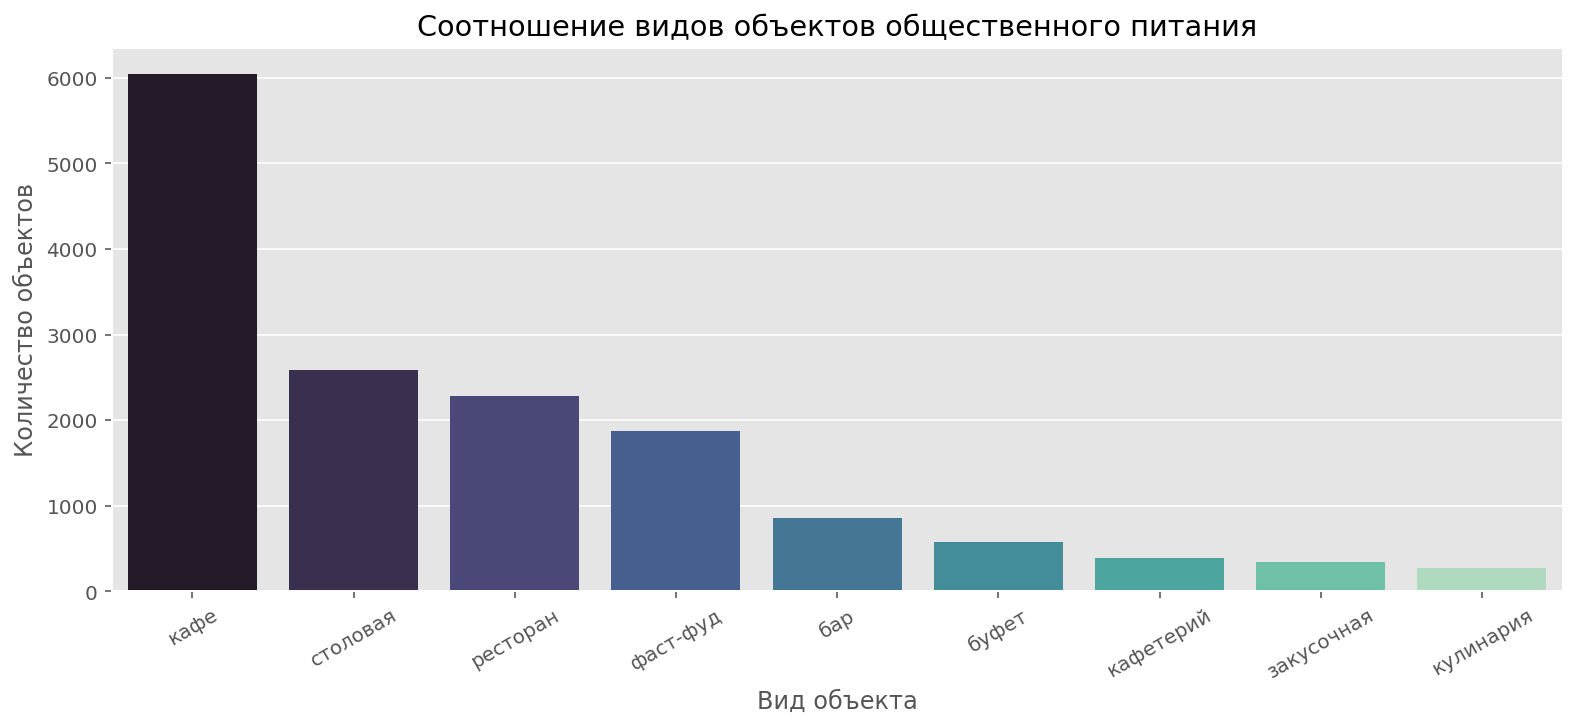

In [54]:
# график соотношения видов объектов общепита
plt.figure(figsize = (13,5))
pic_1 = sns.barplot(x = 'object_type', 
                    y = 'id', 
                    data = typ.sort_values('id', ascending = False),
                    palette = "mako")
pic_1.set_xlabel('Вид объектa')
pic_1.set_ylabel('Количество объектов')
pic_1.set_title('Соотношение видов объектов общественного питания')
plt.xticks(rotation = 30)
plt.show()

Кафе лидируют с большим отрывом.

Теперь посчитаем соотношение сетевых и несетевых заведений по количеству, построим график.

In [55]:
# соотношение сетевых и несетевых заведений
chain = rest_data.pivot_table(values = 'id',
                              index = 'chain',
                              aggfunc = 'count').reset_index()
chain['part'] = chain['id'] / chain['id'].sum() * 100
chain.sort_values(by = 'id', ascending = False).style.format({'part': '{:.2f}%'})

,chain,id,part
0,несетевое,12262,80.55%
1,сетевое,2960,19.45%


Несетевых заведений в 4 раза больше, чем сетевых.

Визуализируем.

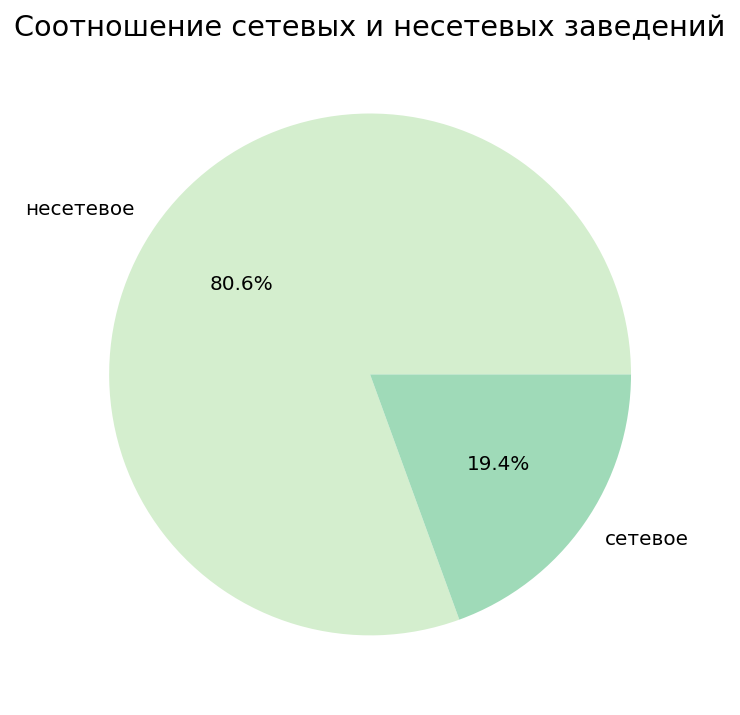

In [56]:
# график соотношения сетевых и несетевых заведений - круговая диаграмма
plt.pie(chain['id'], labels = chain['chain'], colors = sns.color_palette('GnBu', 4), autopct='%1.1f%%')
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

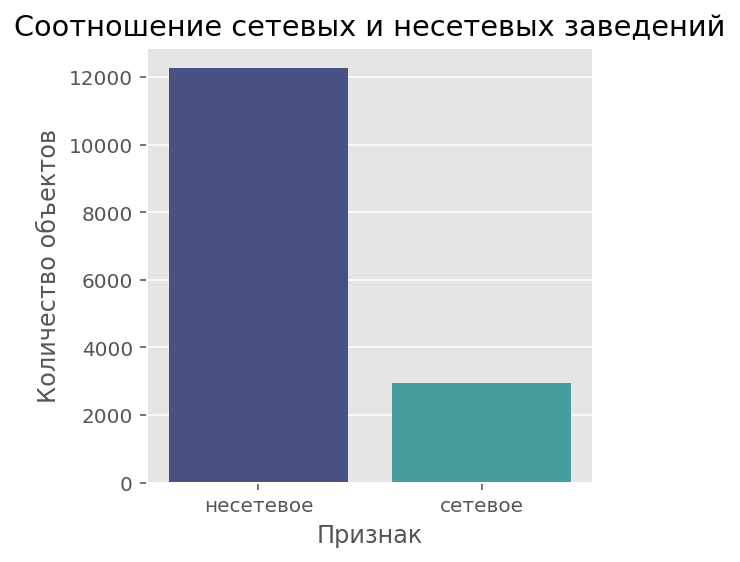

In [57]:
# график соотношения сетевых и несетевых заведений - гистограмма
plt.figure(figsize = (4,4))
pic_2 = sns.barplot(x = 'chain', 
                    y = 'id', 
                    data = chain,
                    palette = 'mako')
pic_2.set_xlabel('Признак')
pic_2.set_ylabel('Количество объектов')
pic_2.set_title('Соотношение сетевых и несетевых заведений')
plt.show()

Разница видна хорошо.

Теперь выясним, для какого вида объекта общественного питания характерно сетевое распространение.

In [58]:
# определение доли сетевых заведений для каждого вида объектов
chain_group = rest_data.pivot_table(values = 'object_name', 
                                      index = 'object_type', 
                                       columns = ['chain'],
                                      aggfunc = 'count').reset_index()
chain_group['chain_part'] = chain_group['сетевое']/(chain_group['сетевое'] + chain_group['несетевое'])*100
chain_group.sort_values(by = 'chain_part', ascending = False).style.format({'chain_part': '{:.2f}%'})

chain,object_type,несетевое,сетевое,chain_part
8,фаст-фуд,1092,785,41.82%
5,кулинария,195,78,28.57%
6,ресторан,1737,542,23.78%
3,кафе,4654,1396,23.07%
2,закусочная,289,56,16.23%
4,кафетерий,340,52,13.27%
0,бар,817,37,4.33%
1,буфет,560,11,1.93%
7,столовая,2578,3,0.12%


Визуализируем, чтобы было проще воспринимать.

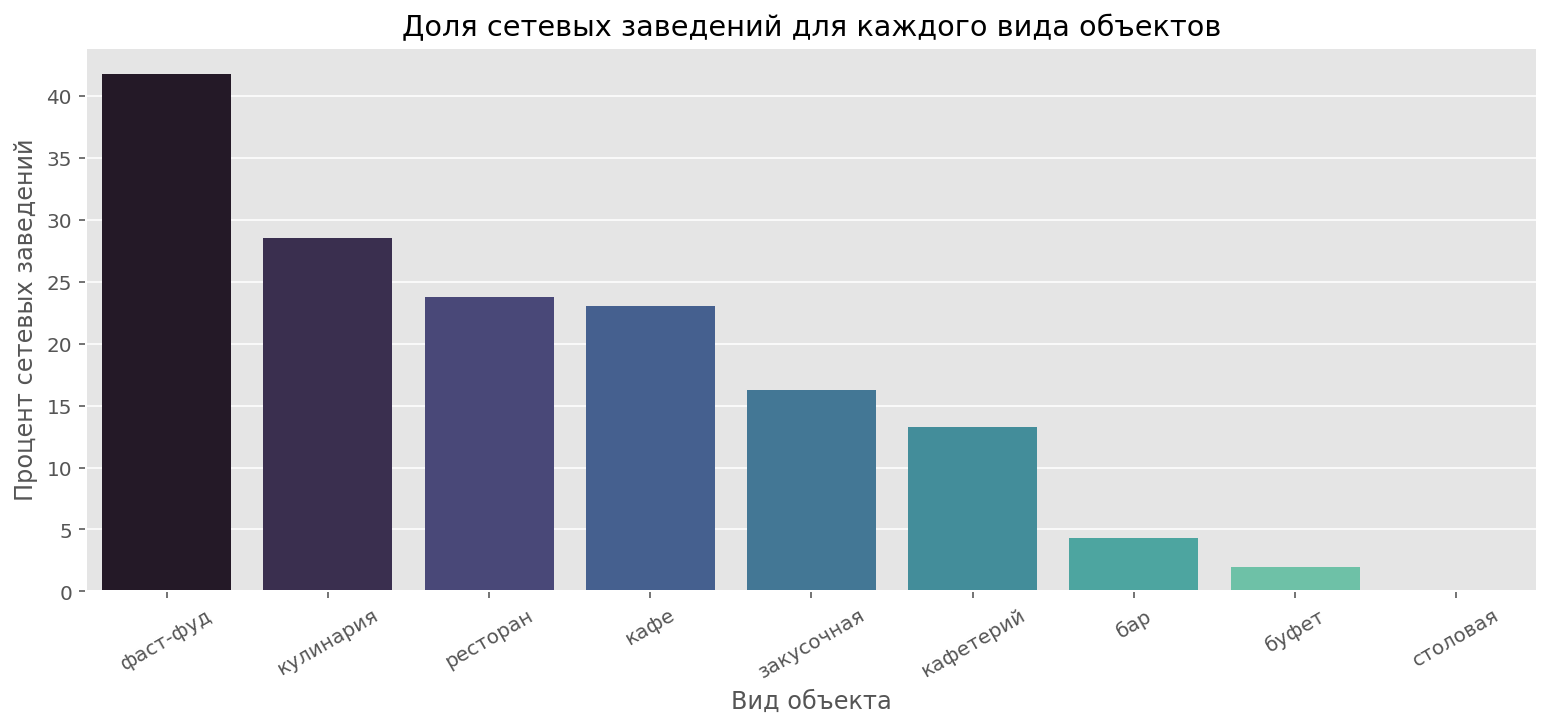

In [59]:
# график с долями сетевых заведений для каждого вида объектов
plt.figure(figsize = (13,5))
pic_3 = sns.barplot(x = 'object_type', 
                    y = 'chain_part', 
                    data = chain_group.sort_values(by = 'chain_part', ascending = False),
                    palette = "mako")
pic_3.set_xlabel('Вид объектa')
pic_3.set_ylabel('Процент сетевых заведений')
pic_3.set_title('Доля сетевых заведений для каждого вида объектов')
plt.xticks(rotation = 30)
plt.show()

Хотя все виды объектов представлены в основном несетевыми заведениями и доля сетевых заведений нигде не составляет даже половины, больше всего сетевой формат характерен для фаст-фудов (41,5%), отделов кулинарии в магазинах (28,6%), ресторанов (23,8%) и кафе (23%).

Идем дальше. Нужно выяснить, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест. Для этого нужно посчитать количество заведений и среднее число посадочных мест в них.

In [60]:
# выборка с сетевыми заведениями
is_chain = rest_data.query('chain == "сетевое"')
# подсчет количества заведений и среднего числа мест
is_chain_table = is_chain.pivot_table(index = 'object_name', 
                                      values = 'number',
                                      aggfunc = ['count', 'median']).reset_index()
is_chain_table.columns = ['object_name', 'count_object', 'median_number']
is_chain_table.sort_values(by = ('count_object'), ascending = False)

,object_name,count_object,median_number
563,шоколадница,157,50.0
25,kfc,155,45.0
330,макдоналдс,149,79.0
109,бургер кинг,137,45.0
521,теремок,94,23.0
...,...,...,...
243,кафе «хлеб насущный»,1,38.0
241,кафе «урюк» хивинская чайхона,1,50.0
240,кафе «торнадо»,1,80.0
237,кафе «тапчан»,1,70.0


Можно попробовать построить график разброса, на котором будет видно распределение количества заведений и числа мест. Нужно будет построить линию по 95-му перцентилю для обоих измерений, чтобы увидеть, где расположено 95% значений.

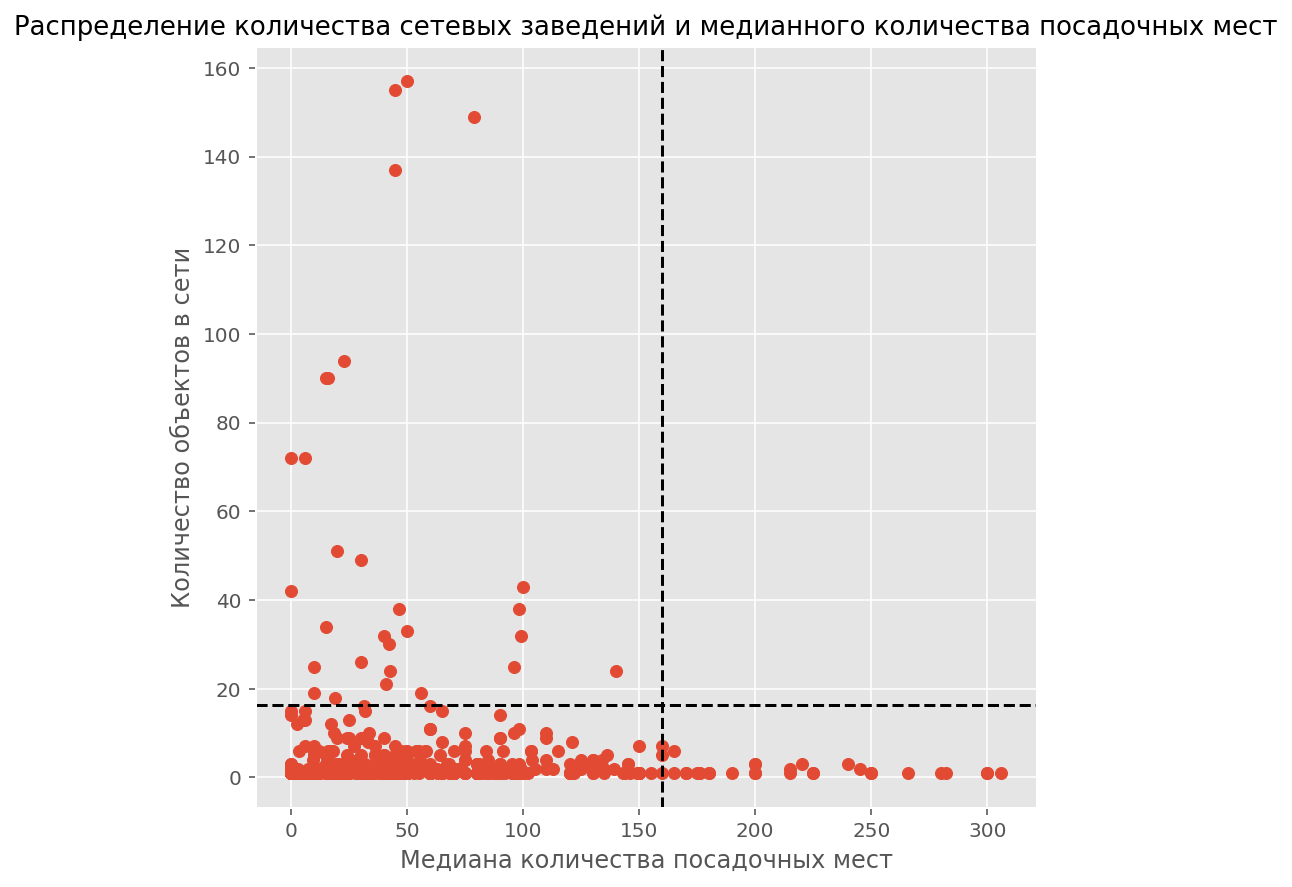

In [61]:
# график распределения количества заведений и числа посадочных мест
plt.figure(figsize = (7,7))
plt.scatter(is_chain_table['median_number'], is_chain_table['count_object'])
plt.xlabel('Медиана количества посадочных мест')
plt.ylabel('Количество объектов в сети')
plt.title('Распределение количества сетевых заведений и медианного количества посадочных мест', fontsize = 13)
plt.axhline(np.percentile(is_chain_table['count_object'], 95), linestyle = '--', color = 'black')
plt.axvline(np.percentile(is_chain_table['median_number'], 95), linestyle = '--', color = 'black')
plt.show()

In [62]:
# отдельный подсчет 95-го перцентиля
display(np.percentile(is_chain_table['count_object'], 95))
display(np.percentile(is_chain_table['median_number'], 95))

16.399999999999864

160.0

Судя по всему, для сетевых объектов характерно небольшое количество заведений (95% = 16 заведений) с небольшим количеством посадочных мест (95% = 160 мест). Но по графику видно - чем меньше заведений в сети, тем больше там посадочных мест. Будем считать, что сети имеют мало заведений с большим количеством посадочных мест.

Теперь нужно описать среднее количество посадочных мест для каждого вида объекта общественного питания и определить, какой вид предоставляет в среднем самое большое количество посадочных мест. Посчитаем среднее значение и медиану. Затем построим графики.

In [63]:
# среднее значение посадочных мест
number_avg = rest_data.pivot_table(values = 'number', 
                                   index = 'object_type', 
                                   aggfunc = ['mean']).reset_index().sort_values(by = ('mean','number'), 
                                                                                 ascending = False)
number_avg.columns = ['object_type', 'mean_number']
number_avg

,object_type,mean_number
7,столовая,130.429291
6,ресторан,96.935498
1,буфет,51.718039
0,бар,43.572600
3,кафе,39.853719
8,фаст-фуд,21.029302
4,кафетерий,9.247449
2,закусочная,7.910145
5,кулинария,5.589744


Теперь посчитаем медианные значения.

In [64]:
# медианное значение посадочных мест
number_median = rest_data.pivot_table(values = 'number', 
                                   index = 'object_type', 
                                   aggfunc = ['median']).reset_index().sort_values(by = ('median','number'), 
                                                                                   ascending = False)
number_median.columns = ['object_type', 'median_number']
number_median

,object_type,median_number
7,столовая,103
6,ресторан,80
0,бар,35
1,буфет,32
3,кафе,31
4,кафетерий,6
8,фаст-фуд,6
2,закусочная,0
5,кулинария,0


Визуализируем.

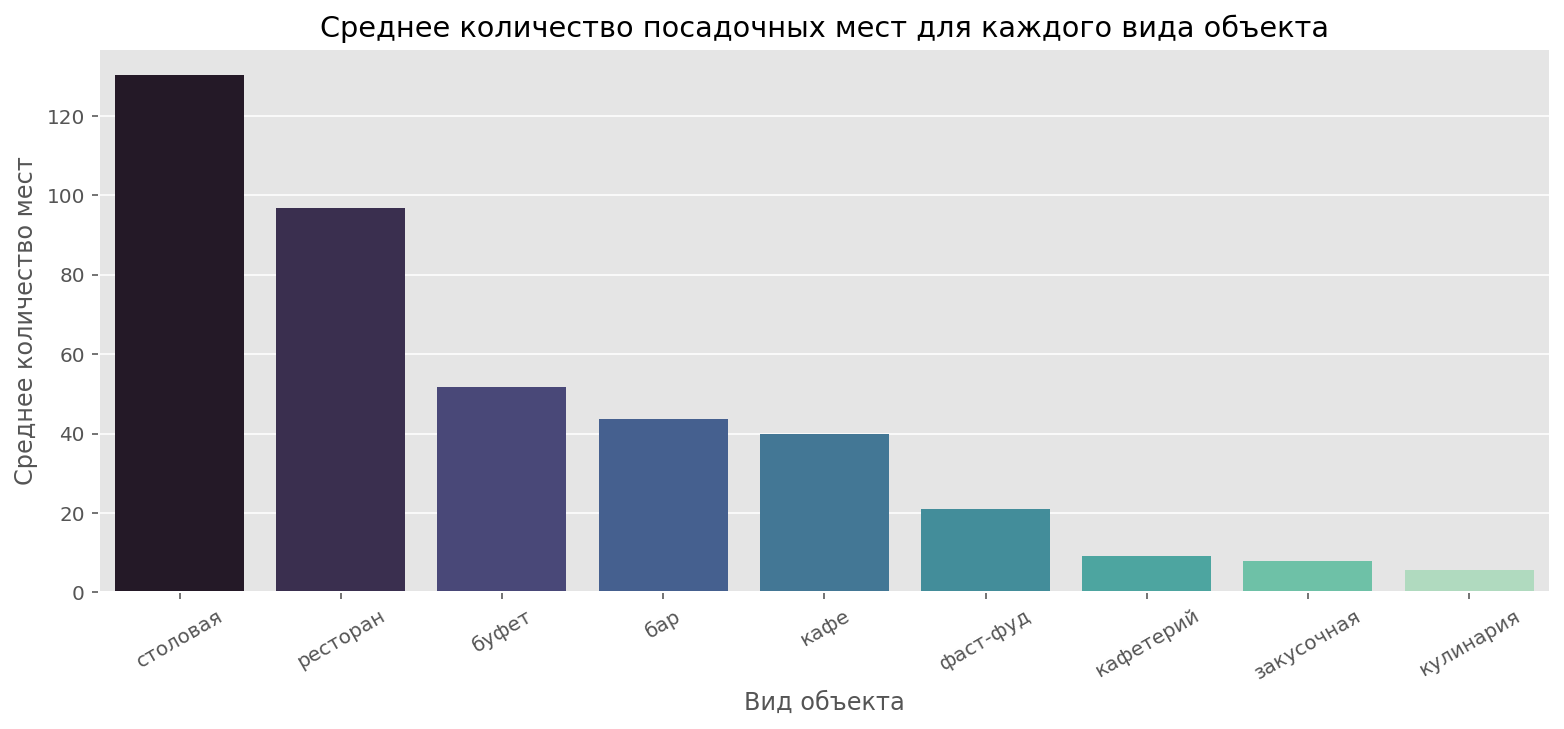

In [65]:
# график со средним значением посадочных мест
plt.figure(figsize = (13,5))
pic_4 = sns.barplot(x = 'object_type', 
                    y = 'mean_number', 
                    data = number_avg.sort_values('mean_number', ascending = False),
                    palette = "mako")
pic_4.set_xlabel('Вид объектa')
pic_4.set_ylabel('Среднее количество мест')
pic_4.set_title('Среднее количество посадочных мест для каждого вида объекта')
plt.xticks(rotation = 30)
plt.show()

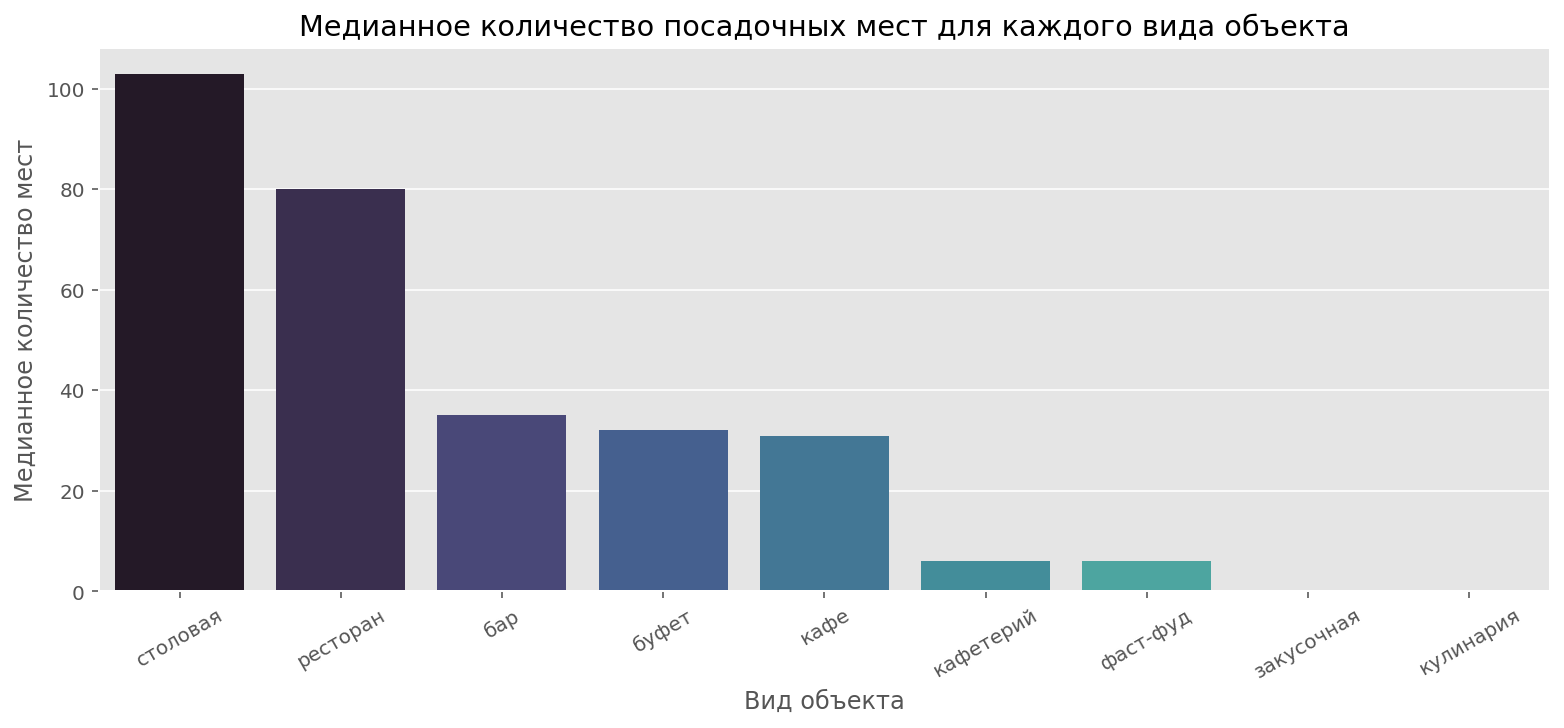

In [66]:
# график с медианным значением посадочных мест
plt.figure(figsize = (13,5))
pic_5 = sns.barplot(x = 'object_type', 
                    y = 'median_number', 
                    data = number_median.sort_values('median_number', ascending = False),
                    palette = "mako")
pic_5.set_xlabel('Вид объектa')
pic_5.set_ylabel('Медианное количество мест')
pic_5.set_title('Медианное количество посадочных мест для каждого вида объекта')
plt.xticks(rotation = 30)
plt.show()

Больше всего посадочных мест предлагают столовые (среднее = 130, медиана = 103), затем рестораны (среднее = 97, медиана = 80). На третьем и четвертом месте бары и буфеты (место зависит от выбора среднего или медианы). В некоторых случаях посадочные места предлагают даже закусочные и кулинарии, однако их все равно очень мало (6-8).

Следующий этап - анализ распределения заведений по городу (местоположения).

Выделим информацию об улице из столбца `address` в отдельный столбец.

In [67]:
# функция для определения конкретного адреса и создания отдельного столбца
list_street = ['улица',
               'ул',
               'переулок',
               'шоссе',
               'проспект',
               'площадь',
               'проезд',
               'бульвар',
               'набережная',
               'линия',
               'тупик',
               'аллея',
               'сквер',
               'просек',
               'просека',
               'тракт',
               'квартал',
               'микрорайон']

def name_of_street(address):
    for parts in address.split(', '):
        for i in list_street:
            if parts.find(i) != -1:
                return parts
    return 'не определено'

rest_data['street'] = rest_data['address'].apply(name_of_street)

rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,сетевое,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал
15363,209186,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал
15364,221900,шоколадница,сетевое,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе


Кажется, сработало, но посмотрим на строки, где улица не определилась.

In [68]:
not_defined = rest_data.query('street == "не определено"')
not_defined

,id,object_name,chain,object_type,address,number,street
1405,20199,это,несетевое,кафе,"город москва, город зеленоград, корпус 401",35,не определено
1406,68113,френдс,несетевое,кафе,"город москва, город зеленоград, корпус 435",34,не определено
1407,20105,кафе «граф монте-кристо»,несетевое,кафе,"город москва, город зеленоград, корпус 436",40,не определено
1408,22982,альфорно,несетевое,кафе,"город москва, город зеленоград, корпус 438",49,не определено
1409,151267,альфорно,несетевое,кафе,"город москва, город зеленоград, корпус 438",45,не определено
...,...,...,...,...,...,...,...
14981,216909,кафе,несетевое,буфет,"город москва, поселение десеновское, деревня в...",10,не определено
14997,216942,шашлычный дворик,несетевое,кафе,"город москва, поселение десеновское, деревня в...",15,не определено
14998,216926,кафе «сахли»,несетевое,закусочная,"город москва, поселение десеновское, деревня в...",10,не определено
15015,208239,газпромнефть,несетевое,кафе,"поселение ""мосрентген"", деревня дудкино, владе...",20,не определено


Целых 312 объектов. Судя по всему, это заведения совсем за пределами МКАД, т.к. для них указан либо другой город, либо поселение/деревня. Оставим их как есть и не будем включать в анализ.

Нужно построить график топ-10 улиц по количеству объектов общественного питания и определить, в каких районах Москвы находятся эти улицы. Для этого нужно выбрать чистые данные, для которых определена улица.

In [69]:
# фильтрация данных
clear = rest_data.query('street != "не определено"')
# топ-10 улиц по количеству заведений
top_10 = clear.groupby('street').count().sort_values(by = 'id', ascending = False).head(10)
# вывод
top_10

,id,object_name,chain,object_type,address,number
street,,,,,,
проспект мира,204,204,204,204,204,204
профсоюзная улица,181,181,181,181,181,181
ленинградский проспект,171,171,171,171,171,171
пресненская набережная,167,167,167,167,167,167
варшавское шоссе,165,165,165,165,165,165
ленинский проспект,148,148,148,148,148,148
проспект вернадского,126,126,126,126,126,126
кутузовский проспект,114,114,114,114,114,114
каширское шоссе,110,110,110,110,110,110


Визуализируем, чтобы было красиво и понятно.

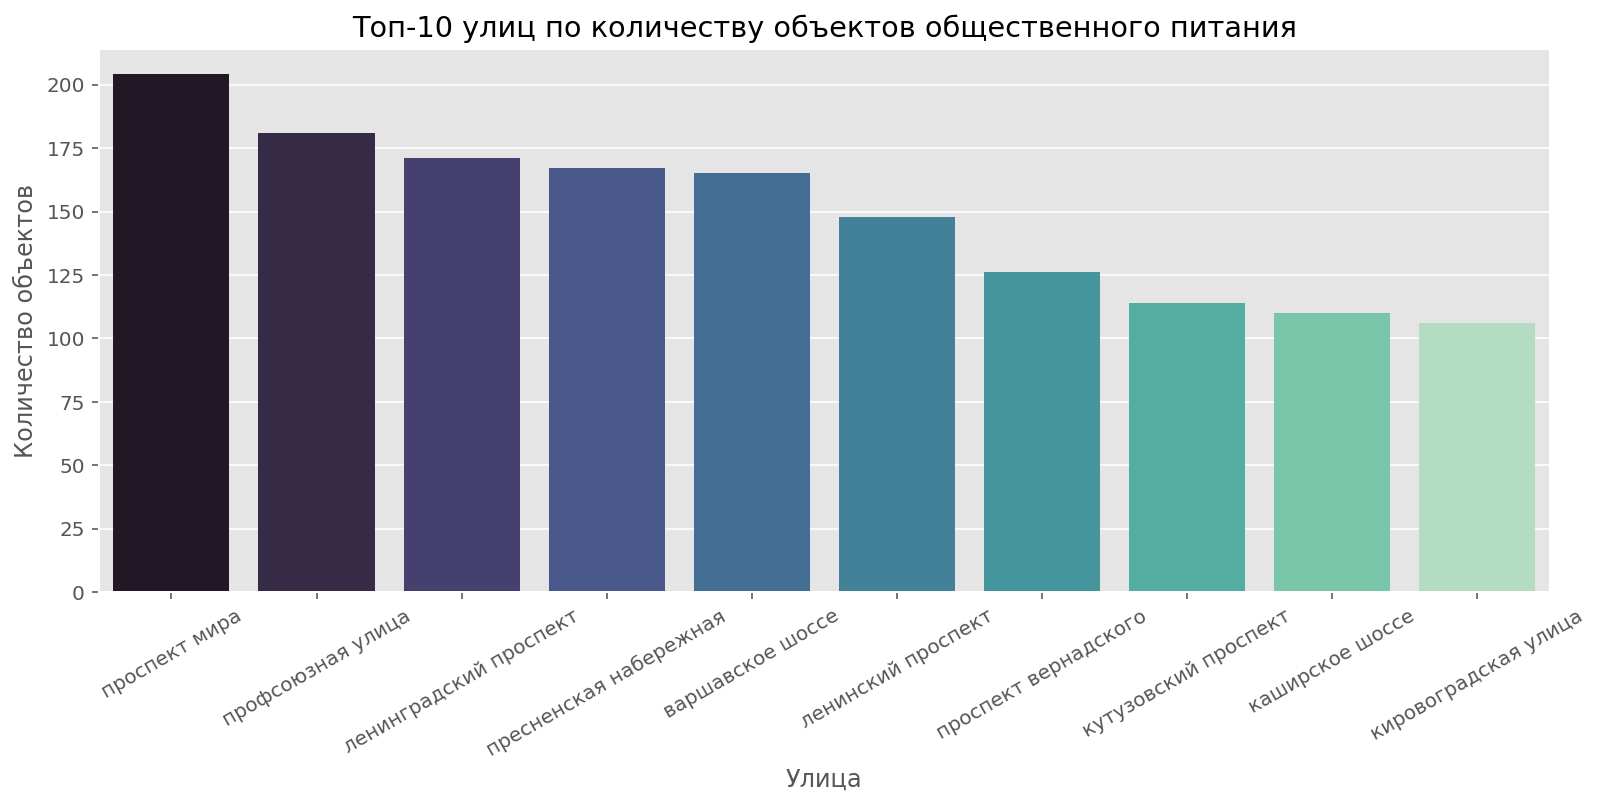

In [70]:
# график с топ-10 улиц, где больше всего заведений
plt.figure(figsize = (13,5))
pic_6 = sns.barplot(x = 'street', 
                    y = 'id', 
                    data = top_10.sort_values('id', ascending = False).reset_index(),
                    palette = "mako")
pic_6.set_xlabel('Улица')
pic_6.set_ylabel('Количество объектов')
pic_6.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation = 30)
plt.show()

Топ-10 улиц есть. Надо определить, в каких районах они находятся. Т.к. это довольно длинные улицы, они будут пересекать сразу несколько районов. Так что придется, наверное, посчитать количество объектов по районам и обращать внимание на самые большие значения. Придется пожертвовать достоверностью, потому что изначально не для всех улиц определились районы.

Выберем в дополнительной таблице столбцы с районом и адресом, затем по адресу выделим названия улиц и присоединим это к основной таблице.

In [72]:
# отбор нужных столбцов из дополнительной таблицы
for_area_new = for_area[['district', 'address']].copy()

# выделение названия улиц
def name_of_street_2(address):
    for parts in address.split(', '):
        for i in list_street:
            if parts.find(i) != -1:
                return parts
    return 'не определено'

for_area_new['street'] = for_area_new['address'].apply(name_of_street_2)

# присоединение данных с районами к данным из основной таблицы
on = ['address']
rest_new = rest_data.merge(for_area_new.drop_duplicates(subset = on), how = 'left', on = on)
rest_new

,id,object_name,chain,object_type,address,number,street_x,district,street_y
0,151635,сметана,несетевое,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,Ярославский район,улица егора абакумова
1,77874,родник,несетевое,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,Таганский район,улица талалихина
2,24309,кафе «академия»,несетевое,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,NaN,NaN
3,21894,пиццетория,сетевое,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,район Лианозово,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,район Лианозово,абрамцевская улица
...,...,...,...,...,...,...,...,...,...
15217,208537,шоколадница,сетевое,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок,Таганский район,3-й крутицкий переулок
15218,209264,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал,Басманный район,улица земляной вал
15219,209186,шоколадница,сетевое,кафе,"город москва, улица земляной вал, дом 33",20,улица земляной вал,Басманный район,улица земляной вал
15220,221900,шоколадница,сетевое,кафе,"город москва, поселение московский, киевское ш...",36,киевское шоссе,поселение Московский,киевское шоссе


In [73]:
# список топ-10 улиц
top_10_streets = top_10.index[:10].to_list()

# таблица с адресами всех объектов на топ-10 улиц
district_10 = rest_new.query('street_x in @top_10_streets')
district_10

,id,object_name,chain,object_type,address,number,street_x,district,street_y
151,155973,кафе «андерсон»,сетевое,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе,NaN,NaN
152,23618,кафе «subway»,сетевое,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе,Донской район,варшавское шоссе
153,155852,кафе «ламаджо»,несетевое,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе,Донской район,варшавское шоссе
154,152556,шаурма в пите,несетевое,фаст-фуд,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе,Нагорный район,варшавское шоссе
155,120658,выпечка,несетевое,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15164,213629,додо пицца,сетевое,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная,Пресненский район,пресненская набережная
15181,198436,милти,сетевое,фаст-фуд,"город москва, ленинградский проспект, дом 80, ...",0,ленинградский проспект,район Сокол,ленинградский проспект
15203,222491,кальянная «мята lounge»,сетевое,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица,район Тёплый Стан,профсоюзная улица
15206,213061,мята,сетевое,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе,NaN,NaN


Попробуем построить график с районами, где больше всего заведений на топ-10 улицах.

In [74]:
# заготовка таблицы с районами
tab_dist = district_10.groupby('district').count().reset_index().sort_values(by = 'id', ascending = False)
tab_dist = tab_dist.head(15)
tab_dist

,district,id,object_name,chain,object_type,address,number,street_x,street_y
9,Пресненский район,167,167,167,167,167,167,167,167
32,район Чертаново Центральное,82,82,82,82,82,82,82,82
28,район Тропарёво-Никулино,68,68,68,68,68,68,68,68
26,район Свиблово,62,62,62,62,62,62,62,62
7,Обручевский район,60,60,60,60,60,60,60,60
15,район Аэропорт,60,60,60,60,60,60,60,60
5,Мещанский район,53,53,53,53,53,53,53,53
16,район Беговой,46,46,46,46,46,46,46,46
1,Алексеевский район,44,44,44,44,44,44,44,44
33,район Чертаново Южное,44,44,44,44,44,44,44,44


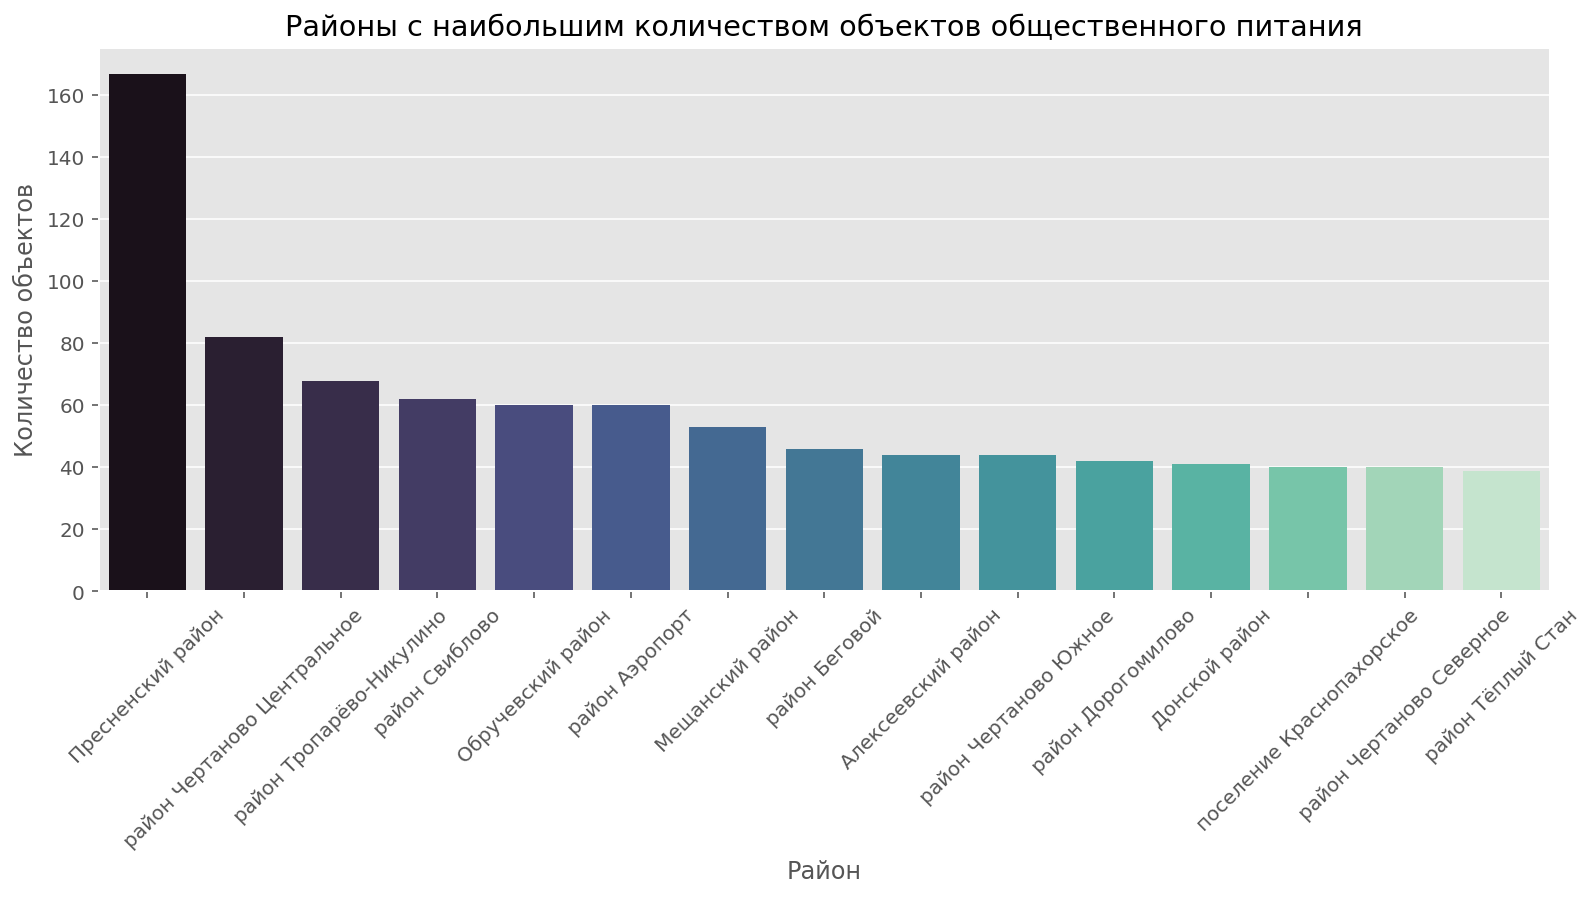

In [75]:
# заготовка таблицы с районами
tab_dist = district_10.groupby('district').count().reset_index().sort_values(by = 'id', ascending = False)
tab_dist = tab_dist.head(15)

# график с районами, где больше всего заведений на топ-10 улицах
plt.figure(figsize = (13,5))
pic_7 = sns.barplot(x = 'district', 
                    y = 'id', 
                    data = tab_dist.sort_values('id', ascending = False).reset_index(),
                    palette = "mako")
pic_7.set_xlabel('Район')
pic_7.set_ylabel('Количество объектов')
pic_7.set_title('Районы с наибольшим количеством объектов общественного питания')
plt.xticks(rotation = 45)
plt.show()

Теперь посмотрим, сколько районов захватывает каждая из топ-10 улиц и что это за районы.

In [76]:
# группировка по улице и районам
streets_and_districts = district_10.groupby(['street_x','district']).agg(count_of_rest = pd.NamedAgg(column = 'id', 
                                                                                                   aggfunc = 'count'))
streets_and_districts.sort_values(by = ['street_x','count_of_rest'], ascending = False)

count_of_rest
street_x               district                                      
профсоюзная улица      район Тёплый Стан                           36
                       район Черёмушки                             33
                       Обручевский район                           30
                       район Коньково                              30
                       Академический район                         15
                       район Ясенево                               14
проспект мира          район Свиблово                              62
                       Мещанский район                             53
                       Алексеевский район                          44
                       Останкинский район                          10
                       район Ростокино                              6
проспект вернадского   район Тропарёво-Никулино                    48
                       район Раменки                               32
                       Ломоносовский район                         13
                       район Проспект Вернадского                  12
                       поселение Вороновское                        1
пресненская набережная Пресненский район                          167
ленинский проспект     Гагаринский район                           32
                       Обручевский район                           30
                       район Тропарёво-Никулино                    20
                       район Якиманка                              12
                       Донской район                               10
                       Ломоносовский район                         10
                       район Тёплый Стан                            3
                       район Проспект Вернадского                   1
ленинградский проспект район Аэропорт                              60
                       район Беговой                               46
                       район Сокол                                 21
                       Хорошёвский район                           13
кутузовский проспект   район Дорогомилово                          42
                       поселение Краснопахорское                   40
                       район Фили-Давыдково                        12
кировоградская улица   район Чертаново Центральное                 74
                       район Чертаново Северное                    21
                       район Чертаново Южное                        7
каширское шоссе        район Нагатино-Садовники                    33
                       район Москворечье-Сабурово                  31
                       район Орехово-Борисово Северное             10
                       район Орехово-Борисово Южное                 4
варшавское шоссе       район Чертаново Южное                       37
                       Нагорный район                              35
                       Донской район                               31
                       район Чертаново Северное                    19
                       район Чертаново Центральное                  8
                       район Нагатино-Садовники                     6
                       район Южное Бутово                           2
                       поселение Воскресенское                      1
                       поселение Щербинка                           1

Сразу видно, какие районы какая улица пересекает. Построим график с количеством.

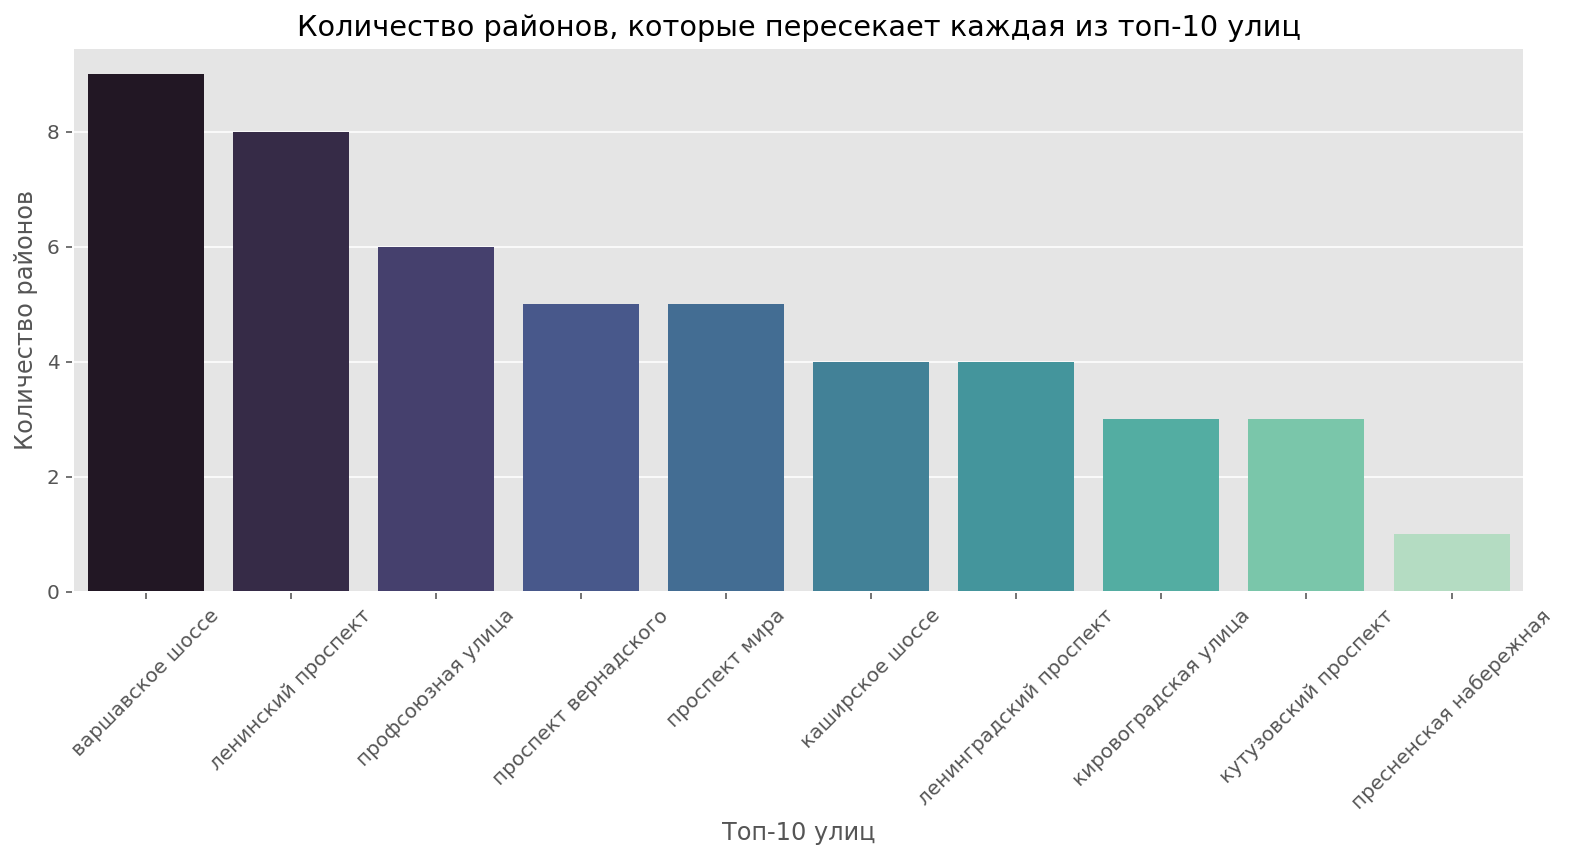

In [77]:
# подсчет количества районов
count_of_districts = streets_and_districts.groupby(['street_x']).agg('count')
count_of_districts.columns = ['count_of_dist']

# график с районами, где больше всего заведений на топ-10 улицах
plt.figure(figsize = (13,5))
pic_8 = sns.barplot(x = 'street_x', 
                    y = 'count_of_dist', 
                    data = count_of_districts.sort_values('count_of_dist', ascending = False).reset_index(),
                    palette = "mako")
pic_8.set_xlabel('Топ-10 улиц')
pic_8.set_ylabel('Количество районов')
pic_8.set_title('Количество районов, которые пересекает каждая из топ-10 улиц')
plt.xticks(rotation = 45)
plt.show()

Все эти улицы довольно длинные и поэтому пересекают сразу несколько районов города, за исключением Пресненской набережной, которая расположена в одном районе около Делового центра. Поэтому на них больше всего заведений.

Районы для топ-10 улиц определили. Осталось только найти число улиц с одним объектом общественного питания и определить для них районы.

In [ ]:
# проверка количества улиц с одним заведением
count_street_one = rest_new.groupby('street_x').count()
one_id = count_street_one.query('id == 1')
len(one_id)

Довольно много таких улиц. Посмотрим, в каких районах их больше всего.

In [ ]:
# список улиц c одним объектом
one_object_streets = one_id.index.to_list()

# таблица с адресами всех объектов на улицах с одним объектом
district_one = rest_new.query('street_x in @one_object_streets')

# заготовка таблицы с районами
tab_dist_2 = district_one.groupby('district').count().reset_index().sort_values(by = 'id', ascending = False)
tab_dist_2 = tab_dist_2.head(15)

# график с районами, где на одной улице всего один объект
plt.figure(figsize = (13,5))
pic_9 = sns.barplot(x = 'district', 
                    y = 'id', 
                    data = tab_dist_2.sort_values('id', ascending = False).reset_index(),
                    palette = "mako")
pic_9.set_xlabel('Район')
pic_9.set_ylabel('Количество улиц с одним объектом')
pic_9.set_title('Районы с улицами, где всего одно заведение')
plt.xticks(rotation = 45)
plt.show()

Районы с улицами, на которых всего один объект, тоже получили.

В Пресненском районе много улиц с одним объектом, но там же и Пресненская набережная, где целых 167 объектов. За исключением этого, район в целом подходит для открытия кафе, т.к. расположение удобное (рядом Деловой центр), конкурировать можно на улицах, где объект всего один. Подойдут также Таганский, Басманный и Тверской районы, Хамовники и Арбат, Замоскворечье - там достаточно много улиц с одним объектом. Остальные районы находятся подальше от центра города, что не очень подходит для оригинального и современного кафе.

Попробуем выбрать улицы для кафе.

In [ ]:
# улицы с одним объектом в удобных районах
good_streets = district_one[
    district_one['district'].isin(['Пресненский район', 'Таганский район', 'район Замоскворечье'])

]

# список подходящих улиц
list_of_streets = good_streets['street_x'].tolist()
list_of_streets

Вполне подойдут Костомаровская набережная, Кожевнический проезд, Большая Серпуховская улица, улица Малая Ордынка.

Анализ закончен. Пора дать рекомендации по открытию кафе с роботами-официантами.

## Шаг 3. Рекомендации создателям кафе

По результатам анализа было определено:

* В Москве очень много кафе (почти 40%), затем примерно наравне идут столовые (почти 17%), рестораны (почти 15%) и фаст-фуды (12%), в разы меньше баров и буфетов (5,6% и 3,8% соответственно). Меньше всего объектов типа "кулинария" (1,8%).

* Несетевых заведений в 4 раза больше, чем сетевых.

* Хотя все виды объектов представлены в основном несетевыми заведениями и доля сетевых заведений нигде не составляет даже половины, больше всего сетевой формат характерен для фаст-фудов (41,5%), отделов кулинарии в магазинах (28,6%), ресторанов (23,8%) и кафе (23%).

* Для сетевых объектов характерно небольшое количество заведений (95% = 16 заведений) с большим количеством посадочных мест (95% = до 160 мест).

* Больше всего посадочных мест предлагают столовые (среднее = 130, медиана = 103), затем рестораны (среднее = 97, медиана = 80). На третьем и четвертом месте бары и буфеты (место зависит от выбора среднего или медианы). В некоторых случаях посадочные места предлагают даже закусочные и кулинарии, однако их все равно очень мало (6-8).

* Больше всего заведений на следующих улицах: Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица.

* Больше всего улиц с одним заведением находится в следующих районах: Таганский, Пресненский, Басманный, Хамовники, Тверской, Замоскворечье, Можайский, Тимирязевский, Южное Бутово, Марьина Роща, Арбат, Соколиная Гора, Сокольники.

С учетом проведенного анализа, создателям кафе с роботами-официантами можно дать следующие рекомендации:

1. По типу это будет как раз кафе, так как они популярны больше всего.

2. Сетевое распространение не характерно для кафе, только 23% заведений этого вида являются сетями. С учетом особенностей планируемого кафе это будет несетевой объект. В дальнейшем в случае успеха можно превратить его в сеть, чтобы продолжать развитие.

3. Отталкиваясь от медианных и средних значений, в данном кафе нужно обеспечить 30-40 посадочных мест.

4. Не рекомендуется открывать кафе на одной из самых "загруженных" улиц, где много конкурентов и есть риск "потеряться" среди них. Лучше расположиться в районах, где хорошая проходимость и не так много заведений. Могут подойти Таганский и Пресненский (за исключением Пресненской набережной) районы, где много деловых центров и большой поток людей, доступный транспорт и, что главное, много улиц с одним объектом общественного питания. Конкуренция там меньше, а потенциал большой. Подойдут также Таганский, Басманный и Тверской районы, Хамовники и Арбат, Замоскворечье - там достаточно много улиц с одним объектом. Остальные районы находятся подальше от центра города, что не очень подходит для оригинального и современного кафе.

5. В Москве много нестандартных и оригинальных заведений, и кафе с роботами вполне может стать популярным, поскольку подобных мест единицы, а людей привлекает что-то новое. При наличии средств можно с успехом создать целую сеть объектов с такой концепцией. Если кафе не будут популярны среди консервативных, по большей части, русских, на них могут обратить внимание туристы из высокоразвитых и технологичных стран.

Презентация: <https://disk.yandex.ru/i/cmu2temX0iKWeg>